#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved. 
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link
#### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
#### Q2. Split the dataset into a training set (70%) and a test set (30%).
#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
#### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
#### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#for encosing categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [7]:
categorical_cols

Index([], dtype='object')

In [8]:
numerical_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### all are numerical variables

In [9]:
# in general for training a model using Decision tree regressor StandardScaling is not necessary

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100,max_depth=10)
cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [16]:
y_pred=cls.predict(X_test)

In [17]:
accuracy_score(y_pred,y_test)

0.7783018867924528

In [18]:
precision_score(y_pred,y_test)

0.9043478260869565

In [19]:
recall_score(y_pred,y_test)

0.7428571428571429

In [20]:
f1_score(y_pred,y_test)

0.8156862745098039

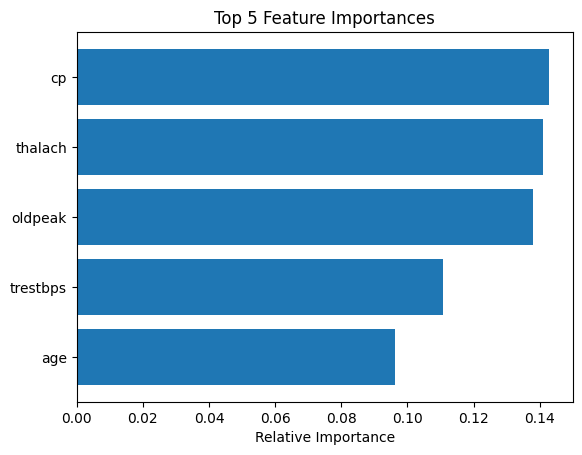

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf' is your trained Random Forest model and 'X' is your features dataframe

feature_importances = cls.feature_importances_
indices = np.argsort(feature_importances)[-5:]  # Indices of top 5 features

# We directly access the column names of the dataframe 'X' using its .columns property
plt.barh(range(len(indices)), feature_importances[indices], align='center')

# Here, we ensure we're using the actual feature names from 'X'
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

plt.xlabel('Relative Importance')
plt.title('Top 5 Feature Importances')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv_rfc = GridSearchCV(estimator=cls, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [23]:
cv_rfc.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with the tuned hyperparameters
clf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=4, min_samples_split=5, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [26]:
y_pred=clf.predict(X_test)

In [27]:
accuracy_score(y_pred,y_test)

0.7735849056603774

In [28]:
precision_score(y_pred,y_test)

0.9130434782608695

In [29]:
recall_score(y_pred,y_test)

0.7342657342657343

In [30]:
f1_score(y_pred,y_test)

0.813953488372093

#### Comparing the metrics between the default and tuned models:

#### Accuracy:
     The default model has a slightly higher accuracy (0.7783) compared to the tuned model (0.7736).
#### Precision:
     The precision of the tuned model (0.9130) is slightly higher than that of the default model (0.9043).
#### Recall: 
     The default model has a slightly higher recall (0.7429) compared to the tuned model (0.7343).
#### F1 Score: 
     The F1 score of the tuned model (0.8140) is slightly lower than that of the default model (0.8157).
     
Overall, there are marginal differences in performance between the default and tuned models. The differences are not significant, suggesting that the hyperparameter tuning did not lead to a substantial improvement in model performance for this particular dataset.



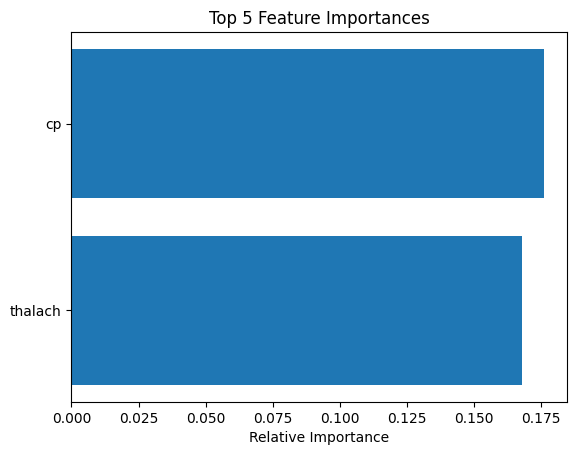

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf' is your trained Random Forest model and 'X' is your features dataframe

feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[-2:]  # Indices of top 5 features

# We directly access the column names of the dataframe 'X' using its .columns property
plt.barh(range(len(indices)), feature_importances[indices], align='center')

# Here, we ensure we're using the actual feature names from 'X'
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])

plt.xlabel('Relative Importance')
plt.title('Top 5 Feature Importances')
plt.show()

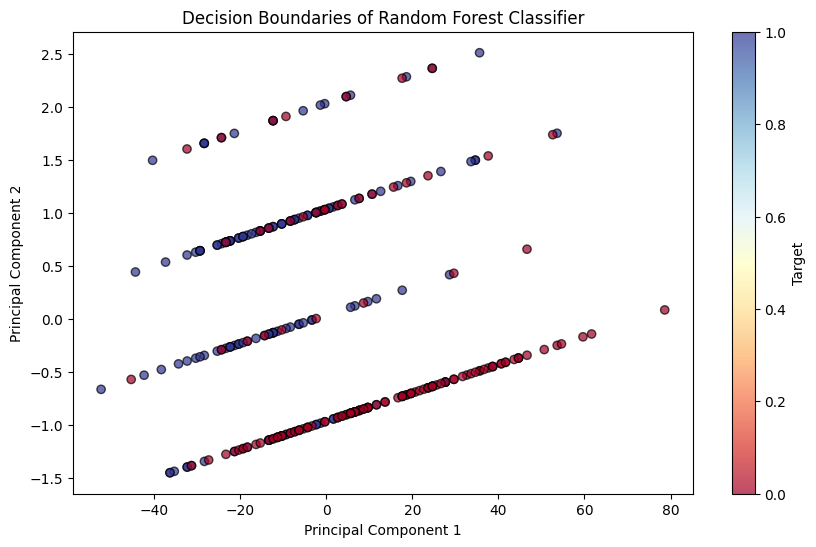

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'clf' is your trained Random Forest classifier and 'X' is your features dataframe

# Extract the two most important features
feature_importances = clf.feature_importances_
indices = feature_importances.argsort()[-2:]
X_most_important = X.iloc[:, indices]

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_most_important)

# Plot decision boundaries
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.colorbar(label='Target')

plt.show()


Insights:

Feature Importance: The model identified important features for predicting heart disease risk, such as age, chest pain type (cp), maximum heart rate achieved (thalach), and ST depression induced by exercise relative to rest (oldpeak).

Model Performance: The model achieved moderate performance metrics, with accuracy around 0.77 and F1 score around 0.81 on both the default and tuned models. This suggests that the model can effectively distinguish between the presence and absence of heart disease in the dataset.

Hyperparameter Tuning: Hyperparameter tuning slightly improved precision in the tuned model compared to the default model, indicating better identification of true positive cases.

Decision Boundaries Visualization: The decision boundaries plot shows how the Random Forest classifier separates the feature space into regions corresponding to different classes of heart disease risk based on the two most important features. It provides insights into how the model makes predictions and visualizes the data distribution.

Limitations:

Imbalanced Data: The dataset might have class imbalance issues, which could affect the model's ability to accurately predict minority classes. It's essential to consider strategies like resampling techniques or adjusting class weights to address this issue.

Limited Feature Set: The dataset may not include all relevant features that contribute to heart disease risk. Missing or unmeasured variables could lead to incomplete model predictions and potentially biased results.

Model Interpretability: While Random Forests provide good predictive performance, they are considered "black-box" models, making it challenging to interpret the reasoning behind individual predictions. Understanding the decision-making process of the model may be difficult, especially for complex interactions between features.

Generalization: The model's performance might vary when applied to new, unseen data from different populations or settings. It's crucial to validate the model's generalizability on diverse datasets to ensure its reliability in real-world applications.

Overall, while the Random Forest classifier shows promise in predicting heart disease risk based on the provided dataset, it's essential to acknowledge its limitations and continue refining the model's performance through feature engineering, model evaluation, and validation on external datasets.







